In [1]:
#from alpha_vantage.techindicators import TechIndicators

import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pandas as pd
import os
import logging
import pickle
logging.basicConfig(filename="dataPull.log", filemode = "w", level=logging.INFO) # add filemode="w" to overwrite
from dataPull import getYfinData as getYfinData

In [3]:
tickerLst = ['XPO', 'BABA', 'NVDA', 'QQQ', 'ENPH']
# requestThd = 5
dateFilt = None # '2021-8-15'
# getData(tickerLst, requestThd, dateFilt) # Alpha Vantage
getYfinData(tickerLst, None)

dir = os.getcwd()
dir = dir + "\\" + "stockData.file"
with open(dir, "rb") as f:
    dump = pickle.load(f)
    print("deserialization of " + dir + " complete...")

deserialization of c:\Users\malikf1\Desktop\DataScience\Local_Development\Personal_Projects\MLStockForecast\stockData.file complete...


In [21]:
stockTicker = 'NVDA'
data = dump[stockTicker]
data = data[data['date'] > '2019-1-1']

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'high'}>],
       [<AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'close'}>,
        <AxesSubplot:title={'center':'volume'}>],
       [<AxesSubplot:title={'center':'dividends'}>,
        <AxesSubplot:title={'center':'stock_splits'}>, <AxesSubplot:>]],
      dtype=object)

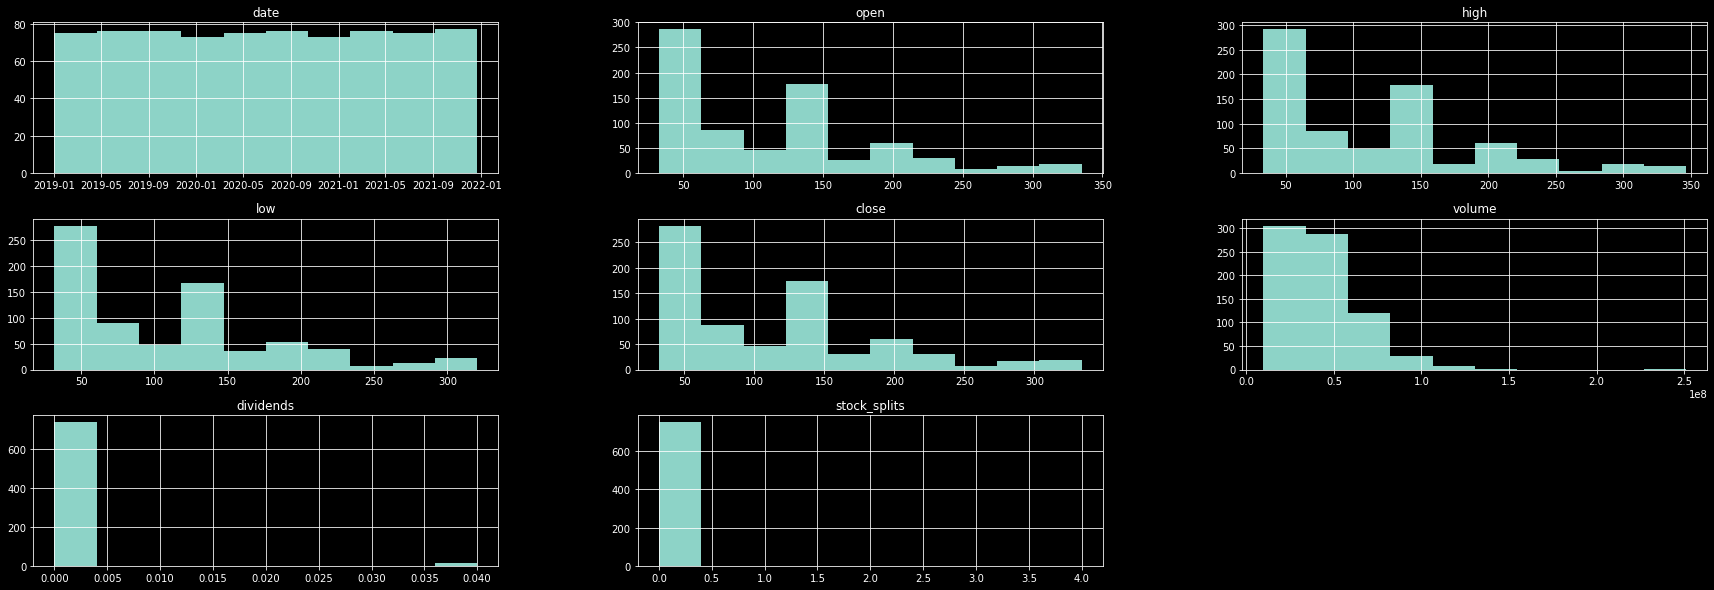

In [22]:
data.hist(figsize = (30, 10))

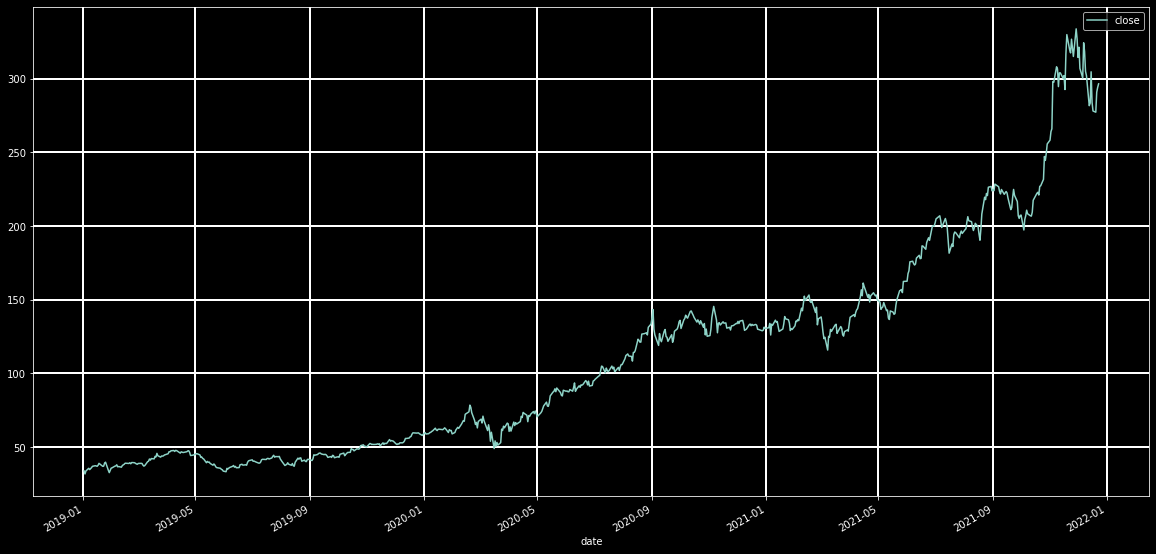

<Figure size 1080x432 with 0 Axes>

In [23]:
plt.style.use('dark_background')

data.plot(y='close', x='date') #['date', 'adjusted_close']
#plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.grid(linestyle='-', linewidth=2)
plt.figure(figsize=(15,6))

plt.show()

In [25]:
"""
Reference: 
    Utilized: https://medium.com/analytics-vidhya/visualizing-historical-stock-price-and-volume-from-scratch-46029b2c5ef9
    Look into Dynamic Plots: https://griddb.net/en/blog/stock-market-analysis-with-python-pandas-plotly-and-griddb/
"""
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
config_title = {'size': 18, 'color': colors['grey'], 'ha': 'left', 'va': 'baseline'}

def format_borders(plot):
    plot.spines['top'].set_visible(False)
    plot.spines['left'].set_visible(False)
    plot.spines['left'].set_color(colors['grey'])
    plot.spines['bottom'].set_color(colors['grey'])

def get_prev_day_info(plot, stock_data):
    previous_close='$' + str("{:,}".format(stock_data['close'][0])) 
    previous_volume=str("{:,}".format(stock_data['volume'][0]))
    previous_date=str(stock_data['date'][0].date())
    plot.set_title(
        'Closing price on ' + previous_date + ': ' + 
         previous_close  + '\nShares traded on ' + previous_date +
         ': ' + previous_volume, fontdict=config_title, loc='left'
    )

def plot_ma(plot, x, y):
    mov_avg = {
        'MA (50)': {'Range': 50, 'Color': colors['orange']}, 
        'MA (100)': {'Range': 100, 'Color': colors['green']}, 
        'MA (200)': {'Range': 200, 'Color': colors['red']}
    }
    
    for ma, ma_info in mov_avg.items():
        plot.plot(
            x, y.rolling(ma_info['Range']).mean(), 
            color=ma_info['Color'], label=ma, linewidth=2, ls='--'
        )

def format_legend(plot):
    plot_legend = plot.legend(loc='upper left', 
    bbox_to_anchor= (-0.005, 0.95), fontsize=16)
    for text in plot_legend.get_texts():
        text.set_color(colors['grey'])

def get_charts(stock_data, movAvgFlg):
    plt.rc('figure', figsize=(20, 10))
    fig, axes = plt.subplots(2, 1, 
                gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout(pad=3)
    
    date = stock_data['date']
    close = stock_data['close']
    vol = stock_data['volume']
    
    plot_price = axes[0]
    plot_price.plot(date, close, color=colors['blue'], linewidth=2, label='Price')
    plot_vol = axes[1]
    plot_vol.bar(date, vol, width=15, color='darkgrey')

    plot_price.yaxis.tick_right()
    plot_price.tick_params(axis='both', **config_ticks)
    plot_price.set_ylabel('Price (in USD)', fontsize=14)
    plot_price.yaxis.set_label_position("right")
    plot_price.yaxis.label.set_color(colors['grey'])
    plot_price.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5, alpha=0.4)
    plot_price.grid(axis='x', color='gainsboro', linestyle='-', linewidth=0.5, alpha=0.4)
    plot_price.set_axisbelow(True)
    format_borders(plot_price)
    format_borders(plot_vol)

    fig.suptitle(stock_data['symbol'][0] + ' Price and Volume', size=36, color=colors['grey'], x=0.24, y=1.10)

    get_prev_day_info(plot_price, stock_data)

    if movAvgFlg: 
        plot_ma(plot_price, date, close)
        format_legend(plot_price)


KeyError: 0

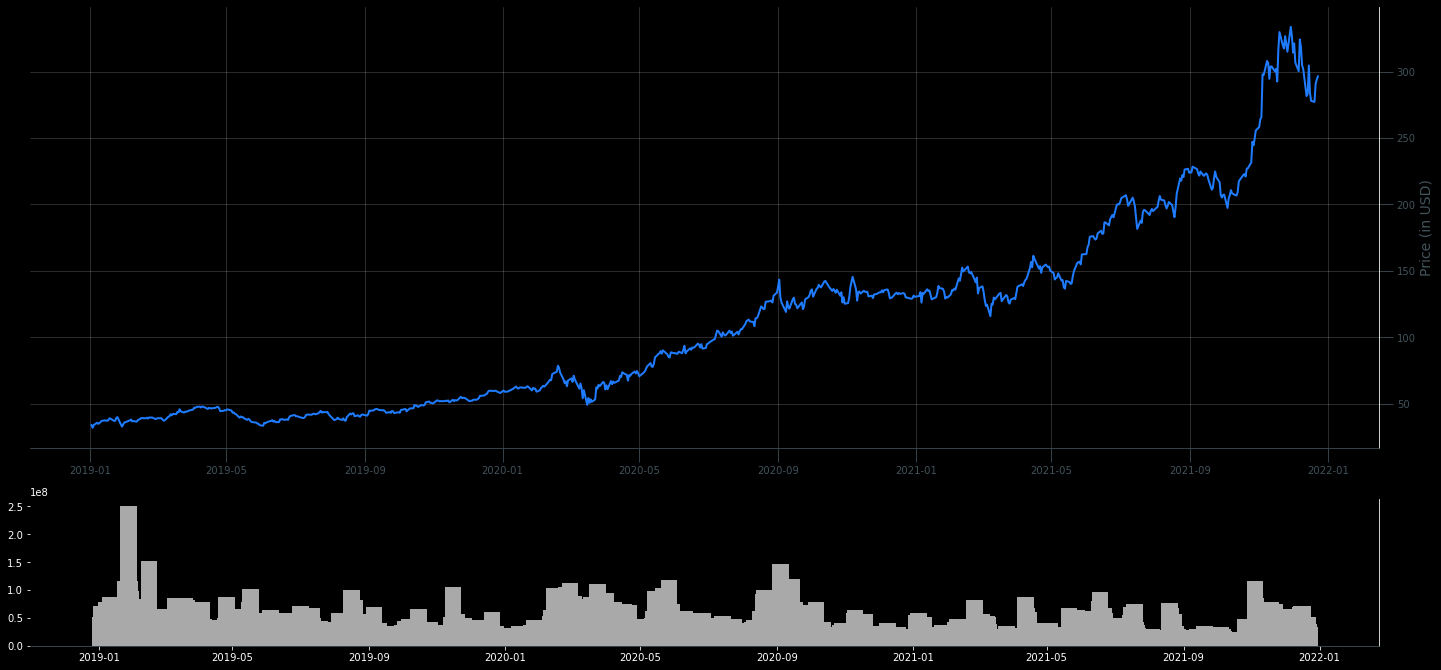

In [26]:
get_charts(data, movAvgFlg = True)

## Machine Learning

In [27]:
import numpy as np 
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA  
from sklearn.metrics import mean_squared_error

C:\Users\malikf1\Anaconda3\envs\python_3_7\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


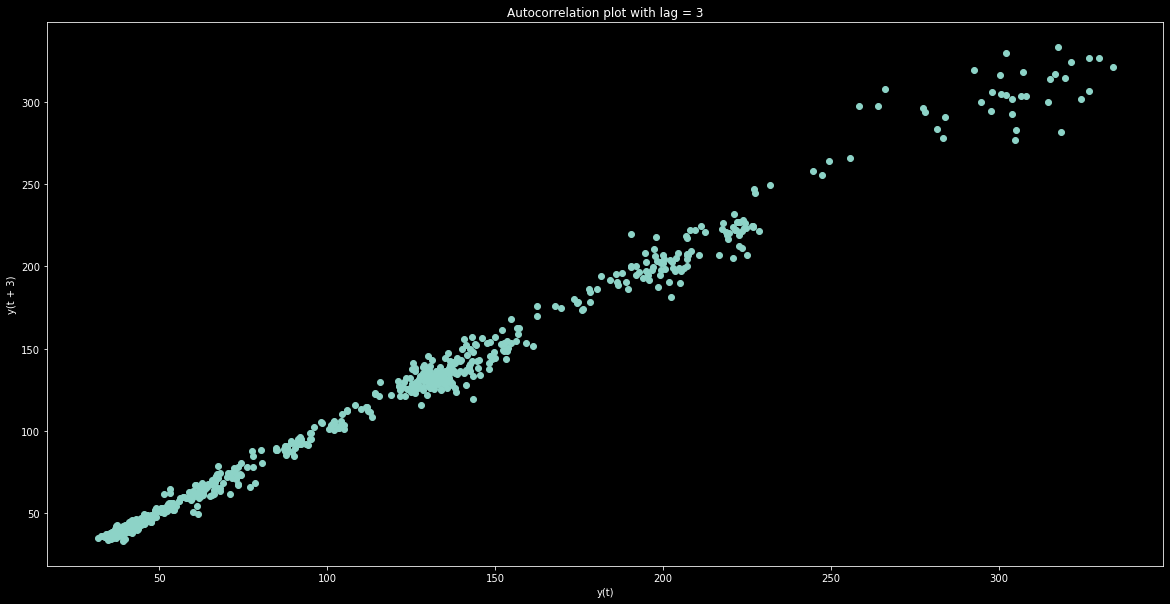

In [28]:
# Autocorrelation/Autocovariance
# Check if there is autocorrelation/serial correlation in the discrete time case.
# In other words, is the correlation of the signal with a delayed copy of itself as a function of delay. 
# Informally, it is the similarity between observations as a function of the time lag between them.
plt.figure()
lag_plot(data['close'], lag=3)
plt.title('Autocorrelation plot with lag = 3')
plt.show()

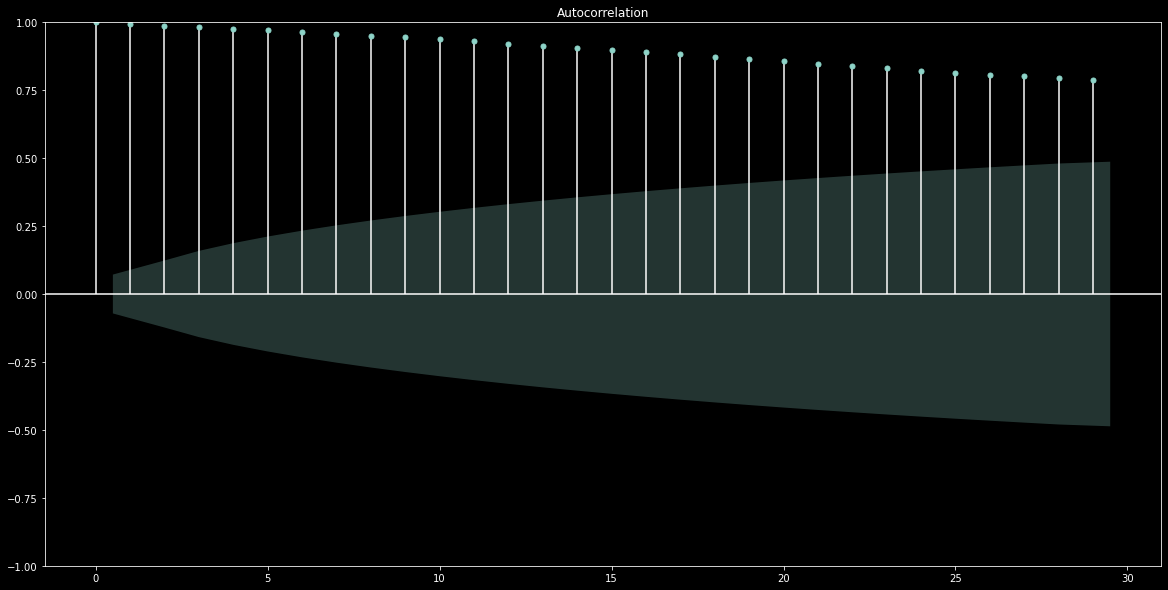

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib import pyplot
plot_acf(data['close'])
pyplot.show()

C:\Users\malikf1\Anaconda3\envs\python_3_7\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


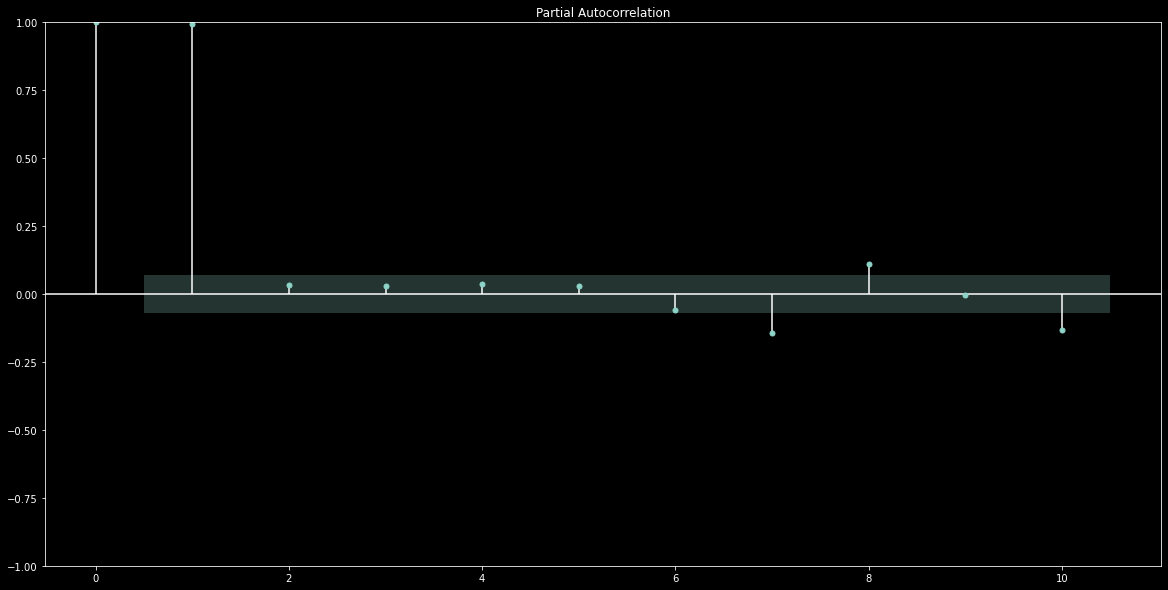

In [30]:
plot_pacf(data['close'], lags=10)
pyplot.show()

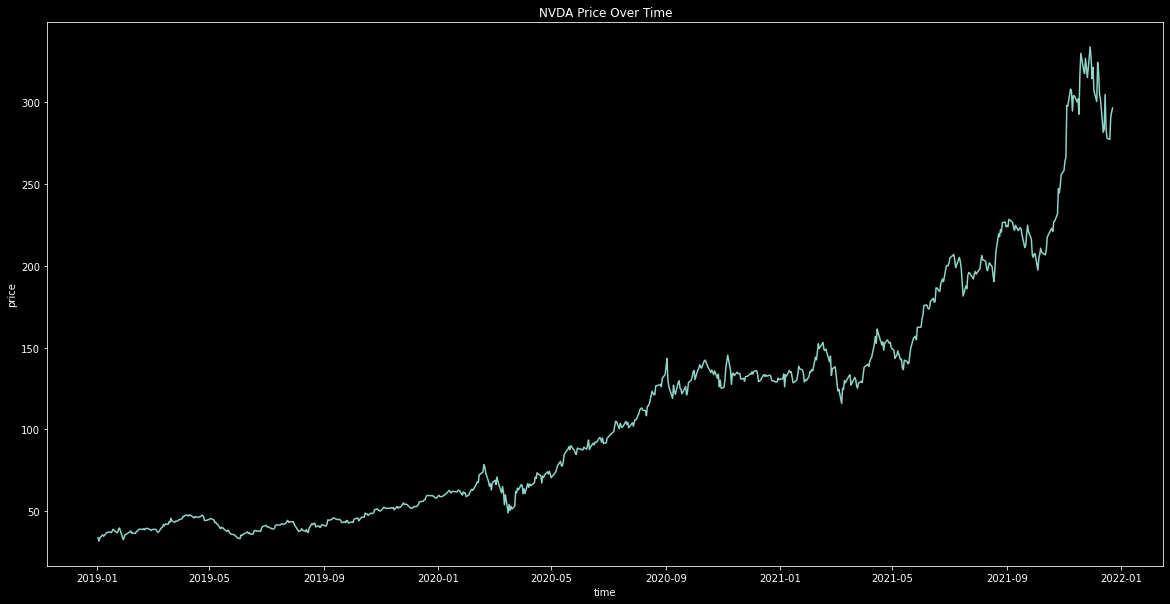

In [31]:
plt.plot(data["date"], data["close"])
#plt.xticks(np.arange(0,1259, 10), data['date'][0:1259:10])
plt.title("{} Price Over Time".format(stockTicker))
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [32]:
# # Converting to Series
# series = pd.Series(data['adjusted_close'].values, index=data['date'])
# series.plot()

In [33]:
def arimaModel(data):    
    # Reference: https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70
    # https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-facebooks-prophet-model-9ee1657132b5
    global test_data
    global test_data_init
    global output
    global history
    global model_predictions



    train_data, test_data_init = data[0:int(len(data)*0.7)], data[int(len(data)*0.7):]
    training_data = train_data['close'].values
    test_data = test_data_init['close'].values

    history = [x for x in training_data] # Convert numpy ndarray to a simple array
    model_predictions = [] # Store model forecasts in here
    N_test_observations = len(test_data) # Number of test forecasts to make 

    for time_point in range(N_test_observations):
        model = ARIMA(history, order=(4,1,0)) # Arima Parameters: p=4, d=1, and q=0
        model_fit = model.fit() # disp=0 removed

        # Forecast a future value
        output = model_fit.forecast()
        yhat = output[0] # extract first element just in case

        model_predictions.append(yhat) # add forecats to list 

        # Add true value to historicals
        true_test_value = test_data[time_point] 
        history.append(true_test_value)

    MSE_error = mean_squared_error(test_data, model_predictions)
    print('Testing Mean Squared Error is {}'.format(MSE_error))



In [34]:
arimaModel(data)

Testing Mean Squared Error is 41.62364280746613


In [35]:
def arimaViz(data):
    global test_set_range
    # test_set_range = data[int(len(data)*0.7):].index
    test_set_range = data[int(len(data)*0.7):]['date']
    plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
    plt.plot(test_set_range, test_data, color='red', label='Actual Price')
    plt.title('Prices Prediction')
    plt.xlabel('Date')
    plt.ylabel('Prices')
    #plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
    plt.legend()
    plt.show()

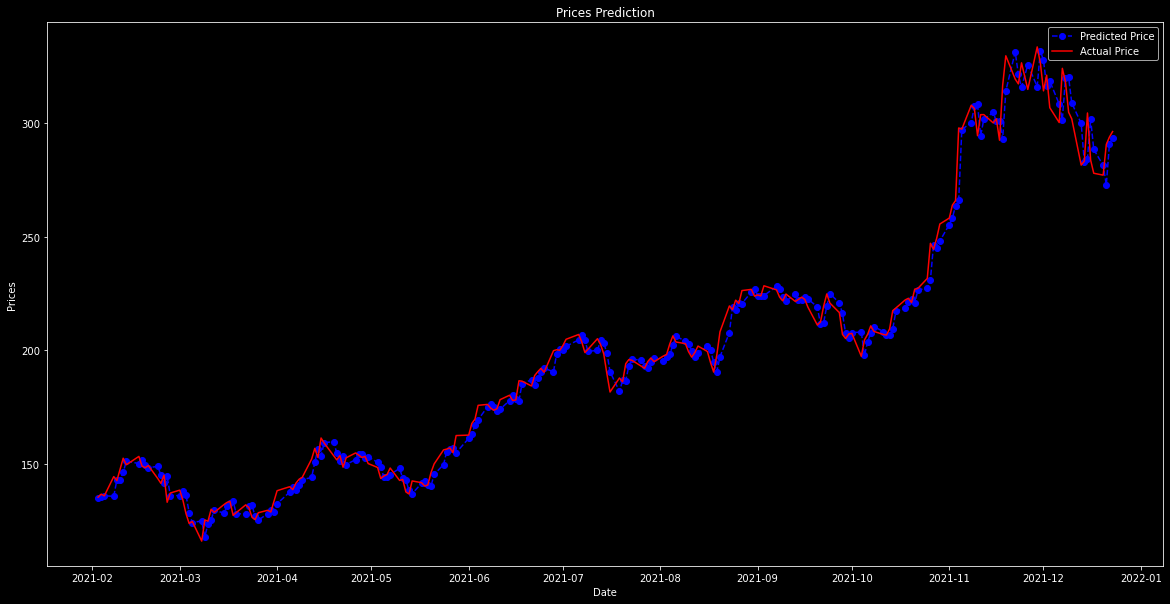

In [36]:
arimaViz(data)

In [38]:
# Full Data Train
training_data = data['close'].values
history = [x for x in training_data] # Convert numpy ndarray to a simple array
model_predictions = [] # Store model forecasts in here

N_test_observations = 365 # Number of test forecasts to make

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0)) # Arima Parameters: p=4, d=1, and q=0
    model_fit = model.fit() # disp=0 removed

    # Forecast a future value
    output = model_fit.forecast()
    yhat = output[0] # extract first element just in case

    model_predictions.append(yhat) # add forecats to list 

    # Add precticed value to historicals
    history.append(yhat)


In [39]:
tempData = [['2021-10-24']]
tempData = pd.date_range('2021-10-22', periods=N_test_observations, freq='B').values
# Create the pandas DataFrame
forecastDate = pd.DataFrame(tempData, columns = ['date'])
indexLst = list(range(len(data), len(data) + N_test_observations))
forecastDate = forecastDate.set_index([pd.Index(indexLst)])

In [40]:
forecastDate

,date
752,2021-10-22
753,2021-10-25
754,2021-10-26
755,2021-10-27
756,2021-10-28
...,...
1112,2023-03-10
1113,2023-03-13
1114,2023-03-14
1115,2023-03-15


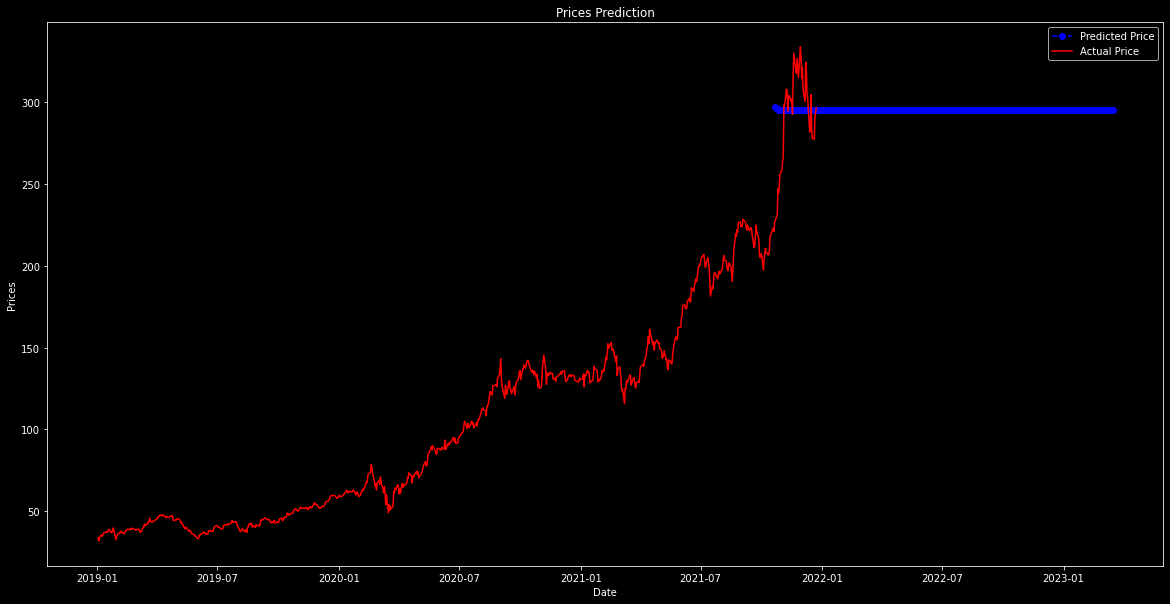

In [42]:
forecastDate['date'] = pd.to_datetime(forecastDate['date'])

plt.plot(forecastDate['date'], model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(data['date'], data['close'], color='red', label='Actual Price')
plt.title('Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
#plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# https://plotly.com/python/multiple-axes/#two-y-axes

def holdOutViz(xData, yTest, yPred): 
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(
        go.Scatter(x= xData, y=yTest, name="Price (Test Data)"),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=xData, y=yPred, name="Price (Model Output)"),
        secondary_y=True,
    )

    fig.update_layout(title_text="Hold Out Period")
    fig.update_xaxes(title_text="Time")
    fig.update_yaxes(title_text="<b>Test</b> Price", secondary_y=False)
    fig.update_yaxes(title_text="<b>Model Output</b> Price", secondary_y=True)
    
    fig.update_layout(
        margin=dict(l=40, r=40, t=40, b=40), width = 1800, height=400, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color="white")
    fig.show()


In [44]:
holdOutViz(data[int(len(data)*0.7):]['date'], test_data, model_predictions)

# Experimental

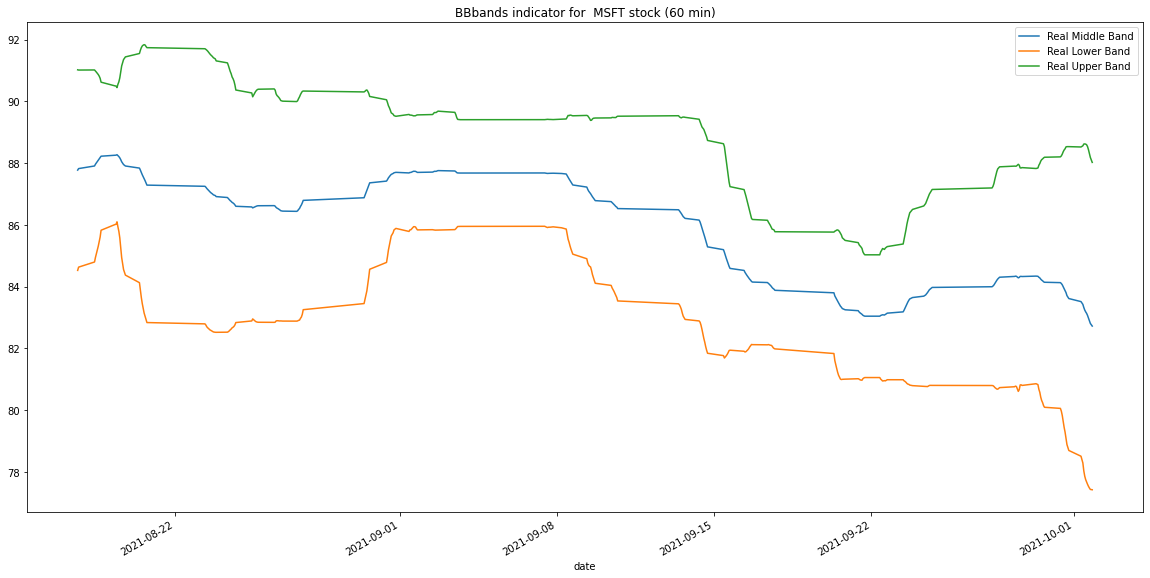

In [ ]:
# Experimental
# https://www.investopedia.com/terms/b/bollingerbands.asp
ti = TechIndicators(key= apiKey, output_format='pandas')

datbbands_data, bbands_data_meta_data = ti.get_bbands(symbol='xpo', interval='60min', time_period=60)

datbbands_data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.show()

In [9]:
########### EVENTUALLY USE THIS INSTEAD OF LIBRARY! ###########

def get_daily_stock_info(symbol):
    url = 'https://www.alphavantage.co/query?'
    params = {                                                 
        'function' : 'TIME_SERIES_DAILY_ADJUSTED',             
        'symbol' : symbol,                                     
        'outputsize' : 'full',                                 
        'apikey' : apiKey                             
    }
    response = requests.get(url, params=params)
    stock_dict = {'Date': [], 'Close': [], 'Volume': []}
    for key,value in response.json().items():
        if key != 'Meta Data': 
            stock_dict['Date'] = list(value.keys())
            for info in value.values():
                stock_dict['Close'].append(info['4. close'])
                stock_dict['Volume'].append(info['6. volume'])
    
    return(stock_dict)

In [10]:
import requests
get_daily_stock_info('xpo')

dict_items([('Information', 'Thank you for using Alpha Vantage! This is a premium endpoint and there are multiple ways to unlock premium endpoints: (1) become a holder of Alpha Vantage Coin (AVC), an Ethereum-based cryptocurrency that provides various utility & governance functions within the Alpha Vantage ecosystem (AVC mining guide: https://www.alphatournament.com/avc_mining_guide/) to unlock all premium endpoints, (2) subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints')])